In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import generate_data, UpSet, from_contents

### Import Excel Files Containing Genecards Results

In [23]:
ctl_s1_s1_s2_s2_s3_s3_s4 = pd.ExcelFile('./genecards_comparisons/ctl_s1_s1_s2_s2_s3_s3_s4.xlsx')
ctl_s1_s1_s2_s3_s4 = pd.ExcelFile('./genecards_comparisons/ctl_s1_s1_s2_s3_s4.xlsx')
ctl_s1_s2_s3 = pd.ExcelFile('./genecards_comparisons/ctl_s1_s2_s3.xlsx')
ctl_s1_s3_s4 = pd.ExcelFile('./genecards_comparisons/ctl_s1_s3_s4.xlsx')
s1_s2_s2_s3_s3_s4 = pd.ExcelFile('./genecards_comparisons/s1_s2_s2_s3_s3_s4.xlsx')
s1_s2_s3_s4 = pd.ExcelFile('./genecards_comparisons/s1_s2_s3_s4.xlsx')

### Extract Pathways & Diseases Sheets from Excel File

In [24]:
ctl_s1_s1_s2_s2_s3_s3_s4_pathways = pd.read_excel(ctl_s1_s1_s2_s2_s3_s3_s4, 'Pathways', skiprows=18)
ctl_s1_s1_s2_s2_s3_s3_s4_diseases = pd.read_excel(ctl_s1_s1_s2_s2_s3_s3_s4, 'Diseases', skiprows=18)

ctl_s1_s1_s2_s3_s4_pathways = pd.read_excel(ctl_s1_s1_s2_s3_s4, 'Pathways', skiprows=18)
ctl_s1_s1_s2_s3_s4_diseases = pd.read_excel(ctl_s1_s1_s2_s3_s4, 'Diseases', skiprows=18)

ctl_s1_s2_s3_pathways = pd.read_excel(ctl_s1_s2_s3, 'Pathways', skiprows=18)
ctl_s1_s2_s3_diseases = pd.read_excel(ctl_s1_s2_s3, 'Diseases', skiprows=18)

ctl_s1_s3_s4_pathways = pd.read_excel(ctl_s1_s3_s4, 'Pathways', skiprows=18)
ctl_s1_s3_s4_diseases = pd.read_excel(ctl_s1_s3_s4, 'Diseases', skiprows=18)

s1_s2_s2_s3_s3_s4_pathways = pd.read_excel(s1_s2_s2_s3_s3_s4, 'Pathways', skiprows=18)
s1_s2_s2_s3_s3_s4_diseases = pd.read_excel(s1_s2_s2_s3_s3_s4, 'Diseases', skiprows=18)

s1_s2_s3_s4_pathways = pd.read_excel(s1_s2_s3_s4, 'Pathways', skiprows=18)
s1_s2_s3_s4_diseases = pd.read_excel(s1_s2_s3_s4, 'Diseases', skiprows=18)

In [25]:
# Visualzie shape and columns of each dataframe
print(f'ctl_s1_s1_s2_s2_s3_s3_s4_pathways: {ctl_s1_s1_s2_s2_s3_s3_s4_pathways.shape}')
print(f'ctl_s1_s1_s2_s2_s3_s3_s4_pathways: {ctl_s1_s1_s2_s2_s3_s3_s4_pathways.columns}')

print(f'ctl_s1_s1_s2_s3_s4_pathways: {ctl_s1_s1_s2_s3_s4_pathways.shape}')
print(f'ctl_s1_s1_s2_s3_s4_pathways: {ctl_s1_s1_s2_s3_s4_pathways.columns}')

print(f'ctl_s1_s2_s3_pathways: {ctl_s1_s2_s3_pathways.shape}')
print(f'ctl_s1_s2_s3_pathways: {ctl_s1_s2_s3_pathways.columns}')

print(f'ctl_s1_s3_s4_pathways: {ctl_s1_s3_s4_pathways.shape}')
print(f'ctl_s1_s3_s4_pathways: {ctl_s1_s3_s4_pathways.columns}')

print(f's1_s2_s2_s3_s3_s4_pathways: {s1_s2_s2_s3_s3_s4_pathways.shape}')
print(f's1_s2_s2_s3_s3_s4_pathways: {s1_s2_s2_s3_s3_s4_pathways.columns}')

print(f's1_s2_s3_s4_pathways: {s1_s2_s3_s4_pathways.shape}')
print(f's1_s2_s3_s4_pathways: {s1_s2_s3_s4_pathways.columns}')

ctl_s1_s1_s2_s2_s3_s3_s4_pathways: (38, 6)
ctl_s1_s1_s2_s2_s3_s3_s4_pathways: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
ctl_s1_s1_s2_s3_s4_pathways: (57, 6)
ctl_s1_s1_s2_s3_s4_pathways: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
ctl_s1_s2_s3_pathways: (145, 6)
ctl_s1_s2_s3_pathways: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
ctl_s1_s3_s4_pathways: (178, 6)
ctl_s1_s3_s4_pathways: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
s1_s2_s2_s3_s3_s4_pathways: (45, 6)
s1_s2_s2_s3_s3_s4_pathways: Index(['Score', 'SuperPath Nam

In [26]:
# Extract 'SuperPath Name' column as sets
ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set = set(ctl_s1_s1_s2_s2_s3_s3_s4_pathways['SuperPath Name'])
ctl_s1_s1_s2_s3_s4_pathways_set = set(ctl_s1_s1_s2_s3_s4_pathways['SuperPath Name'])
ctl_s1_s2_s3_pathways_set = set(ctl_s1_s2_s3_pathways['SuperPath Name'])
ctl_s1_s3_s4_pathways_set = set(ctl_s1_s3_s4_pathways['SuperPath Name'])
s1_s2_s2_s3_s3_s4_pathways_set = set(s1_s2_s2_s3_s3_s4_pathways['SuperPath Name'])
s1_s2_s3_s4_pathways_set = set(s1_s2_s3_s4_pathways['SuperPath Name'])

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

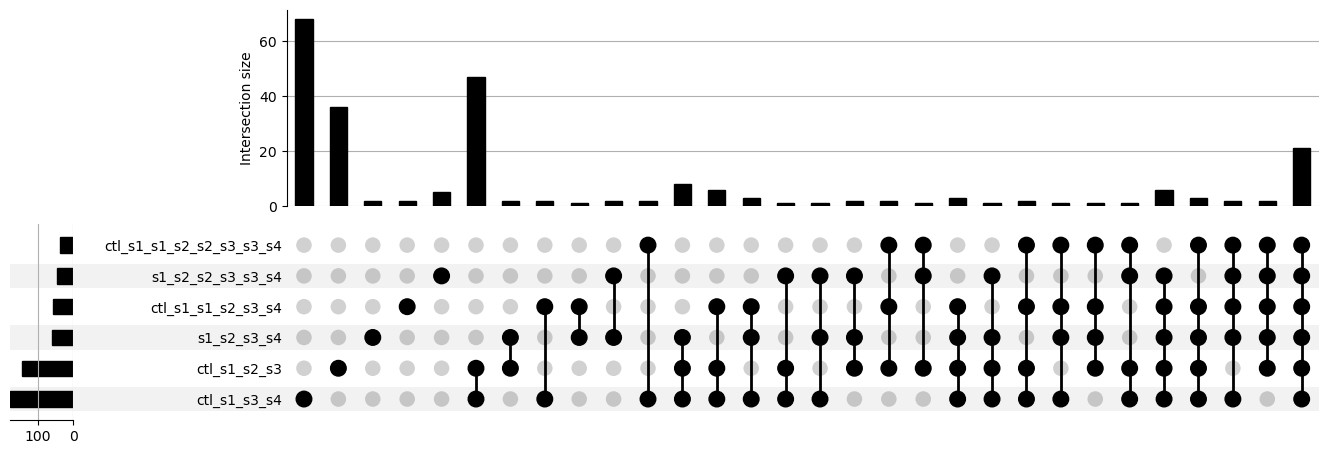

In [27]:
# Combine sets into a dictionary
data = {
    'ctl_s1_s1_s2_s2_s3_s3_s4': ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set,
    'ctl_s1_s1_s2_s3_s4': ctl_s1_s1_s2_s3_s4_pathways_set,
    'ctl_s1_s2_s3': ctl_s1_s2_s3_pathways_set,
    'ctl_s1_s3_s4': ctl_s1_s3_s4_pathways_set,
    's1_s2_s2_s3_s3_s4': s1_s2_s2_s3_s3_s4_pathways_set,
    's1_s2_s3_s4': s1_s2_s3_s4_pathways_set,
}

# Create the UpSet plot
upset_data = from_contents(data)
upset = UpSet(upset_data, subset_size='count')
upset.plot()

# Show the plot
plt.show()

In [28]:
# Supplement with text output
intersection_sets = upset_data.reset_index()

# Identify the column with counts
count_column = 'id'  # As observed, the last column seems to be 'id'

# Largest intersection
largest_intersection = intersection_sets.loc[intersection_sets[count_column] == intersection_sets[count_column].max()]

# Intersection involving all datasets except one
almost_all_intersection = intersection_sets.loc[intersection_sets.drop(count_column, axis=1).sum(axis=1) == 5]

# Print results in a readable format
print("Relevant Intersections:")

print("\nLargest Intersection:")
print("===================================")
print(largest_intersection.to_string(index=False))

print("\nIntersection Involving All Except One:")
print("===================================")
print(almost_all_intersection.to_string(index=False))


Relevant Intersections:

Largest Intersection:
 ctl_s1_s1_s2_s2_s3_s3_s4  ctl_s1_s1_s2_s3_s4  ctl_s1_s2_s3  ctl_s1_s3_s4  s1_s2_s2_s3_s3_s4  s1_s2_s3_s4                     id
                    False               False         False          True              False        False Wnt / Hedgehog / Notch

Intersection Involving All Except One:
 ctl_s1_s1_s2_s2_s3_s3_s4  ctl_s1_s1_s2_s3_s4  ctl_s1_s2_s3  ctl_s1_s3_s4  s1_s2_s2_s3_s3_s4  s1_s2_s3_s4                                                                   id
                     True                True          True          True              False         True                                            Integrins in Angiogenesis
                     True                True          True         False               True         True             Class I MHC Mediated Antigen Processing and Presentation
                     True                True          True         False               True         True                         

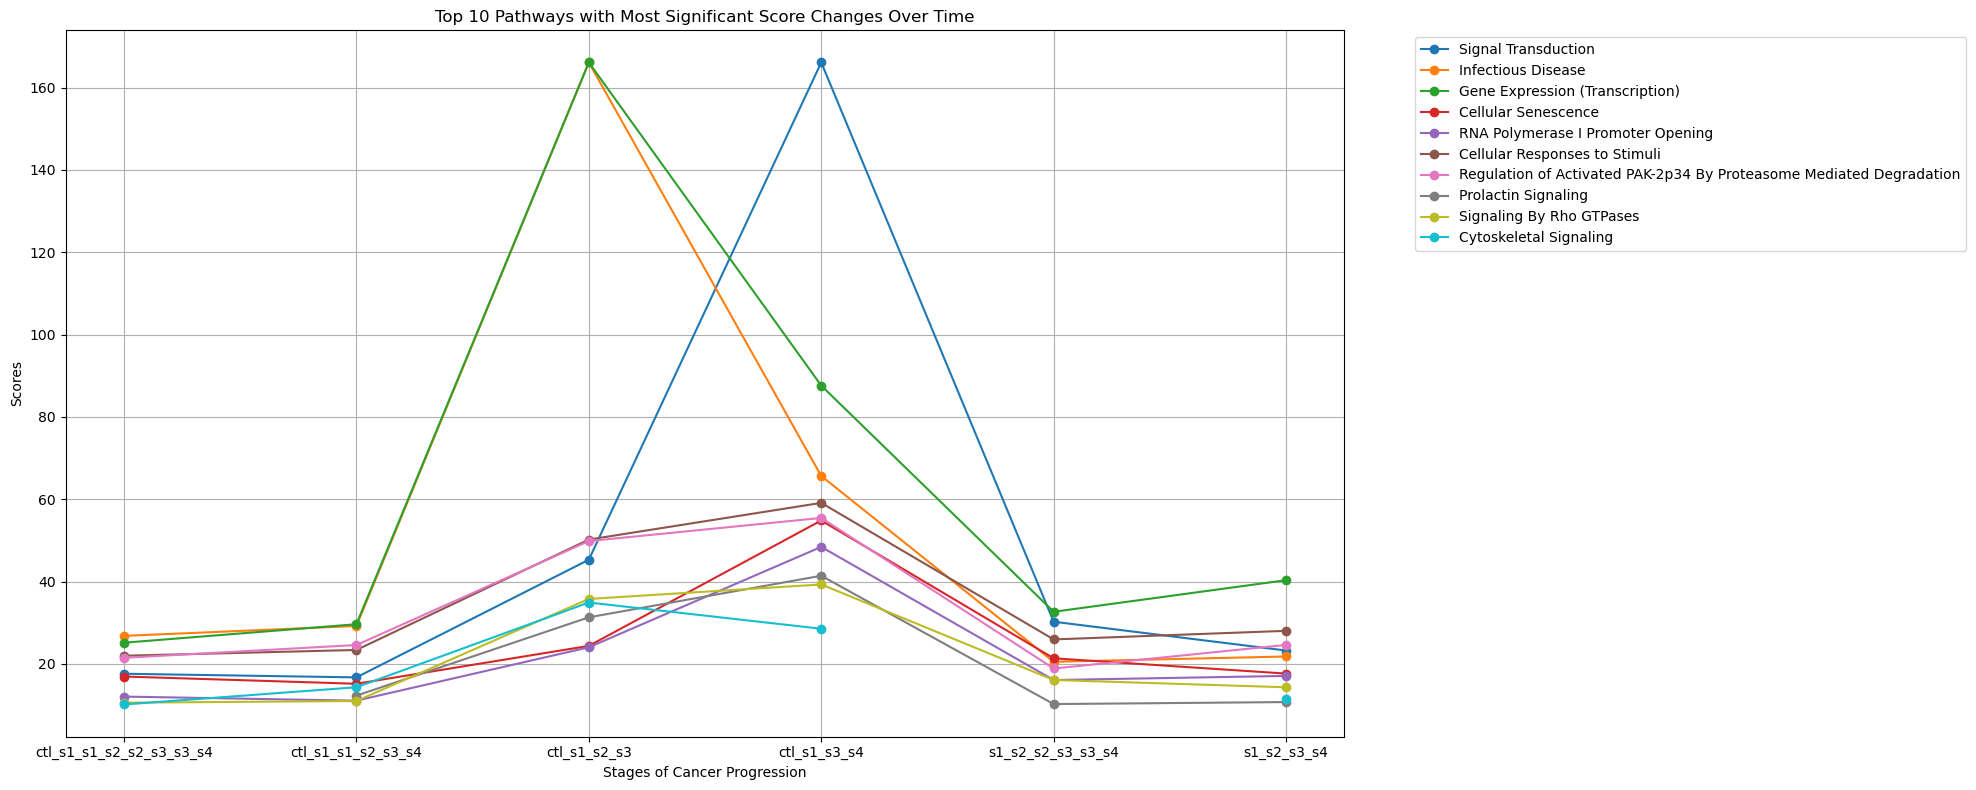

Top pathways with most significant score changes:
                                        SuperPath Name  \
196                                Signal Transduction   
109                                 Infectious Disease   
93                     Gene Expression (Transcription)   
34                                 Cellular Senescence   
176                  RNA Polymerase I Promoter Opening   
33                       Cellular Responses to Stimuli   
180  Regulation of Activated PAK-2p34 By Proteasome...   
172                                Prolactin Signaling   
201                           Signaling By Rho GTPases   
49                              Cytoskeletal Signaling   

     ctl_s1_s1_s2_s2_s3_s3_s4  ctl_s1_s1_s2_s3_s4  ctl_s1_s2_s3  ctl_s1_s3_s4  \
196                 17.597167           16.718481     45.299560    166.096405   
109                 26.797381           29.203803    166.096405     65.636587   
93                  25.138304           29.631565    166.096405     

In [41]:
# Extract 'SuperPath Name' and 'Score' columns
ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set = ctl_s1_s1_s2_s2_s3_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s2_s3_s3_s4'})
ctl_s1_s1_s2_s3_s4_pathways_set = ctl_s1_s1_s2_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s3_s4'})
ctl_s1_s2_s3_pathways_set = ctl_s1_s2_s3_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s2_s3'})
ctl_s1_s3_s4_pathways_set = ctl_s1_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s3_s4'})
s1_s2_s2_s3_s3_s4_pathways_set = s1_s2_s2_s3_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 's1_s2_s2_s3_s3_s4'})
s1_s2_s3_s4_pathways_set = s1_s2_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 's1_s2_s3_s4'})

# Merge the data on 'SuperPath Name'
merged_df = ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set
merged_df = merged_df.merge(ctl_s1_s1_s2_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df = merged_df.merge(ctl_s1_s2_s3_pathways_set, on='SuperPath Name', how='outer')
merged_df = merged_df.merge(ctl_s1_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df = merged_df.merge(s1_s2_s2_s3_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df = merged_df.merge(s1_s2_s3_s4_pathways_set, on='SuperPath Name', how='outer')

# Calculate the score changes only for the numeric columns
numeric_cols = merged_df.columns.drop('SuperPath Name')
merged_df['score_change'] = merged_df[numeric_cols].max(axis=1) - merged_df[numeric_cols].min(axis=1)

# Sort by score changes
sorted_df = merged_df.sort_values(by='score_change', ascending=False)

# Select top pathways with the most significant changes
top_changes_df = sorted_df.head(10)

# Plot the scores of pathways that change the most over time
plt.figure(figsize=(20, 8))
stages = numeric_cols

for index, row in top_changes_df.iterrows():
    plt.plot(stages, row[numeric_cols], marker='o', label=row['SuperPath Name'])

plt.xlabel('Stages of Cancer Progression')
plt.ylabel('Scores')
plt.title('Top 10 Pathways with Most Significant Score Changes Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the top pathways with their score changes
print(f'Top pathways with most significant score changes:\n{top_changes_df}')

In [44]:
ctl_s1_s1_s2_s2_s3_s3_s4_diseases.columns

Index(['Score', 'Name', 'Disease categories', '# Total Genes',
       '# Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL',
       'Genetic Associations', 'Matched Genes for Genetic Associations',
       'Diferentially Expressed Genes in Tissue Samples',
       'Genes Matched to Differentially Expressed Genes'],
      dtype='object')

/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_78577/3072991661.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diseases_in_all_groups['average_score'] = diseases_in_all_groups[numeric_cols].mean(axis=1)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a 

Top Diseases Involved Across All Groups (Highest Average Scores):
                          Name  average_score
1885         Colorectal Cancer      60.736667
1126             Breast Cancer      59.705000
6474           Prostate Cancer      43.406667
4628               Lung Cancer      40.671667
6766      Retinitis Pigmentosa      40.610000
5894            Ovarian Cancer      40.220000
3216            Gastric Cancer      39.833333
3526  Hepatocellular Carcinoma      35.613333
4463   Leukemia, Acute Myeloid      35.121667
4959              Microcephaly      32.815000


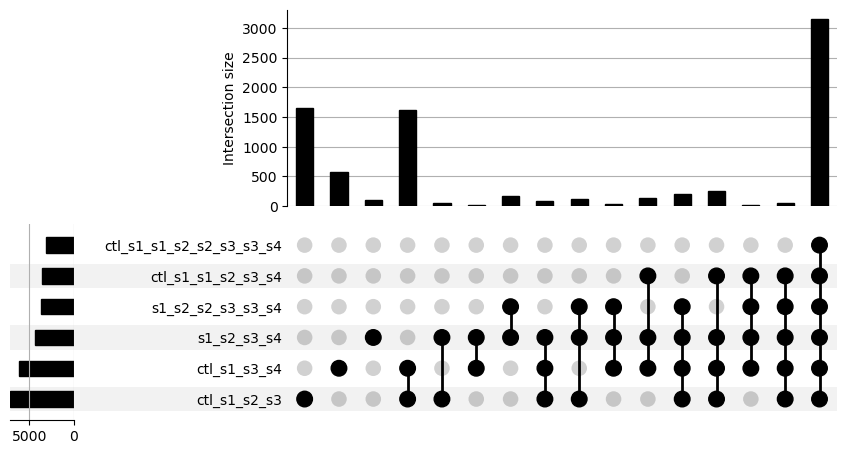

In [49]:
# Extract 'Name' and 'Score' columns
ctl_s1_s1_s2_s2_s3_s3_s4_diseases_set = ctl_s1_s1_s2_s2_s3_s3_s4_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s2_s3_s3_s4'})
ctl_s1_s1_s2_s3_s4_diseases_set = ctl_s1_s1_s2_s3_s4_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s3_s4'})
ctl_s1_s2_s3_diseases_set = ctl_s1_s2_s3_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_s1_s2_s3'})
ctl_s1_s3_s4_diseases_set = ctl_s1_s3_s4_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_s1_s3_s4'})
s1_s2_s2_s3_s3_s4_diseases_set = s1_s2_s2_s3_s3_s4_diseases[['Name', 'Score']].rename(columns={'Score': 's1_s2_s2_s3_s3_s4'})
s1_s2_s3_s4_diseases_set = s1_s2_s3_s4_diseases[['Name', 'Score']].rename(columns={'Score': 's1_s2_s3_s4'})

# Merge the data on 'Name'
merged_df_diseases = ctl_s1_s1_s2_s2_s3_s3_s4_diseases_set
merged_df_diseases = merged_df_diseases.merge(ctl_s1_s1_s2_s3_s4_diseases_set, on='Name', how='outer')
merged_df_diseases = merged_df_diseases.merge(ctl_s1_s2_s3_diseases_set, on='Name', how='outer')
merged_df_diseases = merged_df_diseases.merge(ctl_s1_s3_s4_diseases_set, on='Name', how='outer')
merged_df_diseases = merged_df_diseases.merge(s1_s2_s2_s3_s3_s4_diseases_set, on='Name', how='outer')
merged_df_diseases = merged_df_diseases.merge(s1_s2_s3_s4_diseases_set, on='Name', how='outer')

# Filter diseases that are present in all groups
diseases_in_all_groups = merged_df_diseases.dropna()

# Calculate the average score for each disease across all groups (numeric columns only)
numeric_cols = diseases_in_all_groups.columns.drop('Name')
diseases_in_all_groups['average_score'] = diseases_in_all_groups[numeric_cols].mean(axis=1)

# Sort diseases by the average score
sorted_diseases = diseases_in_all_groups.sort_values(by='average_score', ascending=False)

# Select top diseases with the highest average score
top_diseases = sorted_diseases.head(10)

# Print the top diseases with their average scores
print("Top Diseases Involved Across All Groups (Highest Average Scores):")
print(top_diseases[['Name', 'average_score']])

# Create the UpSet plot for diseases
data_diseases = {
    'ctl_s1_s1_s2_s2_s3_s3_s4': set(ctl_s1_s1_s2_s2_s3_s3_s4_diseases['Name']),
    'ctl_s1_s1_s2_s3_s4': set(ctl_s1_s1_s2_s3_s4_diseases['Name']),
    'ctl_s1_s2_s3': set(ctl_s1_s2_s3_diseases['Name']),
    'ctl_s1_s3_s4': set(ctl_s1_s3_s4_diseases['Name']),
    's1_s2_s2_s3_s3_s4': set(s1_s2_s2_s3_s3_s4_diseases['Name']),
    's1_s2_s3_s4': set(s1_s2_s3_s4_diseases['Name']),
}

upset_data_diseases = from_contents(data_diseases)
upset_diseases = UpSet(upset_data_diseases, subset_size='count')
upset_diseases.plot()

# Show the plot
plt.show()

Top Pathways Involved Across All Groups (Highest Average Scores):
                                        SuperPath Name  average_score
93                     Gene Expression (Transcription)      63.573504
109                                 Infectious Disease      55.004962
196                                Signal Transduction      49.864247
33                       Cellular Responses to Stimuli      34.768530
180  Regulation of Activated PAK-2p34 By Proteasome...      32.467270
169                               Pleural Mesothelioma      26.581471
34                                 Cellular Senescence      25.046925
136                             Metabolism of Proteins      23.245049
31                                 Cell Cycle, Mitotic      22.075959
176                  RNA Polymerase I Promoter Opening      21.451664


/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_78577/3010361197.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathways_in_all_groups['average_score'] = pathways_in_all_groups[numeric_cols_pathways].mean(axis=1)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

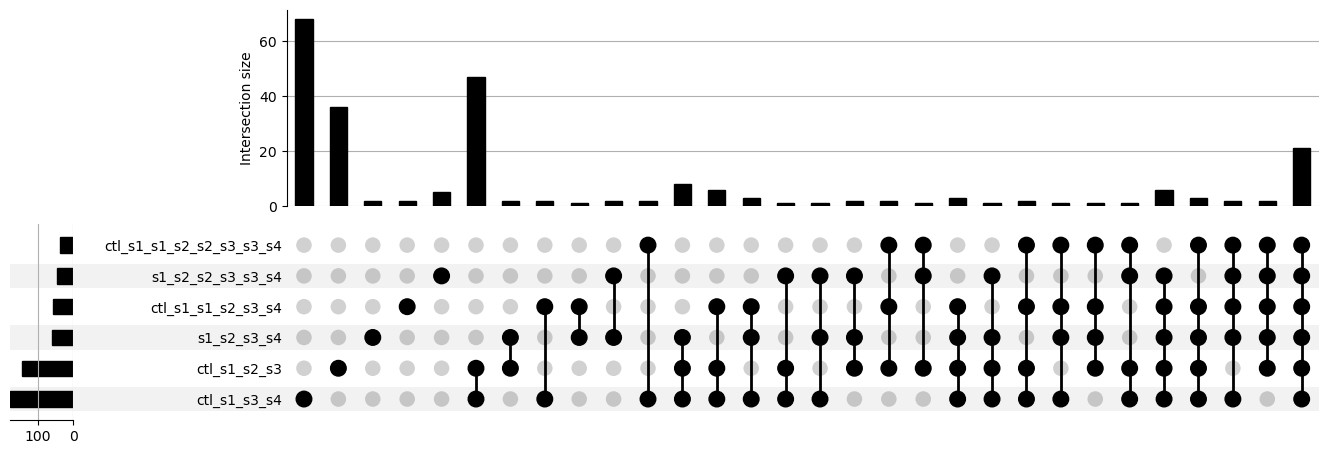

In [50]:
# Extract 'SuperPath Name' and 'Score' columns
ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set = ctl_s1_s1_s2_s2_s3_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s2_s3_s3_s4'})
ctl_s1_s1_s2_s3_s4_pathways_set = ctl_s1_s1_s2_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s1_s2_s3_s4'})
ctl_s1_s2_s3_pathways_set = ctl_s1_s2_s3_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s2_s3'})
ctl_s1_s3_s4_pathways_set = ctl_s1_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_s1_s3_s4'})
s1_s2_s2_s3_s3_s4_pathways_set = s1_s2_s2_s3_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 's1_s2_s2_s3_s3_s4'})
s1_s2_s3_s4_pathways_set = s1_s2_s3_s4_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 's1_s2_s3_s4'})

# Merge the data on 'SuperPath Name'
merged_df_pathways = ctl_s1_s1_s2_s2_s3_s3_s4_pathways_set
merged_df_pathways = merged_df_pathways.merge(ctl_s1_s1_s2_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df_pathways = merged_df_pathways.merge(ctl_s1_s2_s3_pathways_set, on='SuperPath Name', how='outer')
merged_df_pathways = merged_df_pathways.merge(ctl_s1_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df_pathways = merged_df_pathways.merge(s1_s2_s2_s3_s3_s4_pathways_set, on='SuperPath Name', how='outer')
merged_df_pathways = merged_df_pathways.merge(s1_s2_s3_s4_pathways_set, on='SuperPath Name', how='outer')

# Filter pathways that are present in all groups
pathways_in_all_groups = merged_df_pathways.dropna()

# Calculate the average score for each pathway across all groups (numeric columns only)
numeric_cols_pathways = pathways_in_all_groups.columns.drop('SuperPath Name')
pathways_in_all_groups['average_score'] = pathways_in_all_groups[numeric_cols_pathways].mean(axis=1)

# Sort pathways by the average score
sorted_pathways = pathways_in_all_groups.sort_values(by='average_score', ascending=False)

# Select top pathways with the highest average score
top_pathways = sorted_pathways.head(10)

# Print the top pathways with their average scores
print("Top Pathways Involved Across All Groups (Highest Average Scores):")
print(top_pathways[['SuperPath Name', 'average_score']])

# Create the UpSet plot for pathways
data_pathways = {
    'ctl_s1_s1_s2_s2_s3_s3_s4': set(ctl_s1_s1_s2_s2_s3_s3_s4_pathways['SuperPath Name']),
    'ctl_s1_s1_s2_s3_s4': set(ctl_s1_s1_s2_s3_s4_pathways['SuperPath Name']),
    'ctl_s1_s2_s3': set(ctl_s1_s2_s3_pathways['SuperPath Name']),
    'ctl_s1_s3_s4': set(ctl_s1_s3_s4_pathways['SuperPath Name']),
    's1_s2_s2_s3_s3_s4': set(s1_s2_s2_s3_s3_s4_pathways['SuperPath Name']),
    's1_s2_s3_s4': set(s1_s2_s3_s4_pathways['SuperPath Name']),
}

upset_data_pathways = from_contents(data_pathways)
upset_pathways = UpSet(upset_data_pathways, subset_size='count')
upset_pathways.plot()